In [1]:
#pip install ucimlrepo
# Import the data
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features 
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 
  
# metadata 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata) 
  
# variable information 
#print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables) 

ConnectionError: Error connecting to server

In [ ]:
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets 

In [ ]:
df = pd.DataFrame(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features)
df['target'] = pd.DataFrame(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets)
#X = pd.DataFrame(df)
#df['target'] = pd.DataFrame(y)

In [ ]:
X.head()

In [ ]:
df.columns

In [ ]:
#str_to_int = {"eight": 8, 
              #"five": 5,
              #"four": 4,
              #"six": 6,
              #"three": 3,
              #"twelve": 12,
              #"two": 2}
str_to_int = {'Male': 0,
              'Female': 1,
                'no': 0,
                'yes': 1,
                'Sometimes': 1,
                'Frequently': 2,
                'Always': 3,
                'Insufficient_Weight': 0,
                'Normal_Weight': 1,
                'Overweight_Level_I': 2,
                'Overweight_Level_II': 3,
                'Obesity_Type_I': 4,
                'Obesity_Type_II': 5,
                'Obesity_Type_III': 6,
                'Public_Transportation': 0,
                'Automobile': 1,
                'Motorbike': 2,
                'Bike': 3,
                'Walking': 4
             }

# Fix the columns using the Pandas replace() method
df[df.columns] = df[df.columns].replace(str_to_int, regex=False)
df.head(20)

In [ ]:
df['target'].value_counts()

In [ ]:
df.info()

In [ ]:
# df.plot.scatter(
#     x="Height",
#     y="Weight",
#     c="target",
#     colormap='winter')

In [ ]:
for item in df.columns:
# execute statements
    df.plot.scatter(
    x=item,
    y="Weight",
    c="target",
    colormap='winter')

In [ ]:
df.columns[1]

In [ ]:
#  df.plot.scatter(
#      x=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
#        'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
#        'CALC', 'MTRANS', 'target'],

#      y=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
#        'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
#        'CALC', 'MTRANS', 'target'],
#      c="target",
#      colormap='winter')
# #df.columns


In [ ]:
# # Drop the customer_segments column so it isn't considered a feature. 
# cc_df_clean = ccinfo_default_df.drop(['customer_segments'], axis=1)
# cc_df_clean.head()
df_clean = df.drop(['target'], axis=1)
df_clean.head()

In [ ]:
len(df_clean.columns)

In [ ]:
# Import the PCA module
from sklearn.decomposition import PCA

In [ ]:
# Instantiate the PCA instance and declare the number of PCA variables
pca = PCA(n_components=16)

In [ ]:
df_pca = pca.fit_transform(df_clean)

# Review the first 5 rows of list data
df_pca[:5]

In [52]:
len(df_clean.columns)

16

In [53]:
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([9.41956947e-01, 5.28990517e-02, 1.13406816e-03, 7.73478656e-04,
       6.58900391e-04, 5.10445742e-04, 4.76709310e-04, 4.27057648e-04,
       3.42684048e-04, 2.57650587e-04, 2.15828309e-04, 1.44540909e-04,
       1.17797756e-04, 5.34366380e-05, 2.68940912e-05, 4.50863791e-06])

In [54]:
# Create the PCA DataFrame
df_pca_df = pd.DataFrame(
    df_pca,
    columns=["PCA1", "PCA2", "PCA3","PCA4","PCA5", "PCA6", "PCA7","PCA8","PCA9", "PCA10", "PCA11", "PCA12","PCA13","PCA14", "PCA15", "PCA16"]
)

# Review the PCA DataFrame
df_pca_df.head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16
0,-22.729671,-2.137751,-0.857046,-0.678778,0.026724,-0.366601,-0.203518,0.116607,-0.836970,-0.273183,0.352318,0.272514,0.823442,-0.145204,-0.006013,-0.041105
1,-30.710060,-1.763894,1.706412,0.464614,-1.269763,1.196227,-0.742261,0.218298,0.125640,-0.305943,0.134706,-0.097041,0.933109,0.805349,0.901641,0.132178
2,-9.636526,-0.853925,0.895079,0.004519,-0.529164,-0.454777,-0.182843,-0.225062,1.301659,-0.062492,-0.125410,-0.011001,1.042283,-0.169282,-0.093931,-0.047857
3,0.543826,2.788785,2.249963,0.098053,2.843296,1.479595,-0.213906,-0.268398,1.250565,-0.271857,-0.399949,0.670397,0.312611,-0.257283,-0.060410,-0.014612
4,3.080507,-2.436649,-1.529694,1.198855,0.381425,0.218132,-0.305301,-0.947521,0.356964,0.397364,-0.161708,1.030426,0.502625,-0.188485,-0.033616,-0.097942
5,-33.296466,6.471560,-0.397178,-0.696123,0.515349,0.043464,-0.645501,-0.853821,0.281114,-0.053254,-0.408248,0.392475,-0.424763,-0.061888,-0.008165,0.061508
6,-31.607082,0.406361,0.533453,-0.396194,1.195721,1.219536,-0.336291,0.053446,0.049220,-0.576741,-0.066195,-0.656578,-0.106653,-0.084554,0.011629,0.135546
7,-33.665455,-0.604513,1.691504,0.451321,-1.059439,0.274270,0.063558,-0.931141,0.565836,-0.129568,-0.123888,0.672206,0.466731,-0.235607,-0.038292,0.081028
8,-22.556432,0.833412,0.044769,-0.455156,-0.421745,-0.056677,-0.445290,0.271601,1.157150,-0.064754,-0.969709,-0.590781,0.189474,-0.063200,-0.062718,-0.040793
9,-18.678667,-1.365536,0.093176,-0.217265,-0.254218,-0.810202,-0.023476,-0.270972,-0.657115,-0.022517,-0.274608,-0.175879,-0.021955,0.006014,0.000745,0.002622


In [58]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 17))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_pca_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,1.540813e+06
1,2,5.027836e+05
2,3,2.814067e+05
3,4,1.966544e+05
4,5,1.592466e+05


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

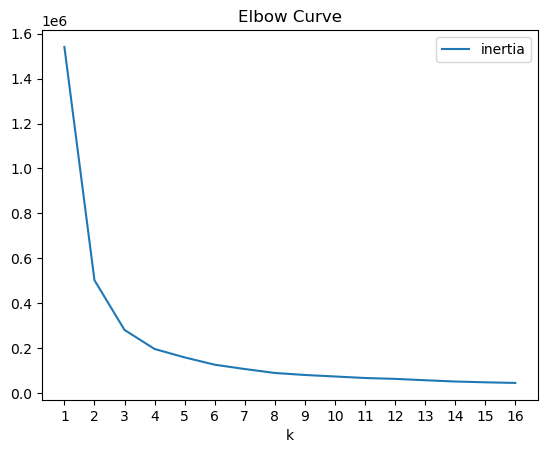

In [59]:
# Plot the Elbow Curve
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [60]:
# Determine the rate of decrease between each k value
k = df_elbow["k"]
inertia = df_elbow["inertia"]
for i in range(1, len(k)):
    percentage_decrease = (inertia[i-1] - inertia[i]) / inertia[i-1] * 100
    print(f"Percentage decrease from k={k[i-1]} to k={k[i]}: {percentage_decrease:.2f}%")

Percentage decrease from k=1 to k=2: 67.37%
Percentage decrease from k=2 to k=3: 44.03%
Percentage decrease from k=3 to k=4: 30.12%
Percentage decrease from k=4 to k=5: 19.02%
Percentage decrease from k=5 to k=6: 20.44%
Percentage decrease from k=6 to k=7: 15.17%
Percentage decrease from k=7 to k=8: 16.35%
Percentage decrease from k=8 to k=9: 9.93%
Percentage decrease from k=9 to k=10: 8.26%
Percentage decrease from k=10 to k=11: 9.13%
Percentage decrease from k=11 to k=12: 5.78%
Percentage decrease from k=12 to k=13: 9.47%
Percentage decrease from k=13 to k=14: 9.88%
Percentage decrease from k=14 to k=15: 6.83%
Percentage decrease from k=15 to k=16: 5.64%


In [67]:
# Define the model with 3 clusters
model = KMeans(n_clusters=3, n_init='auto', random_state=0)

# Fit the model
model.fit(df_pca_df)

# Make predictions
k_3 = model.predict(df_pca_df)

# Create a copy of the PCA DataFrame
df_pca_predictions_df = df_pca_df.copy()

# Add a class column with the labels
df_pca_predictions_df["target"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

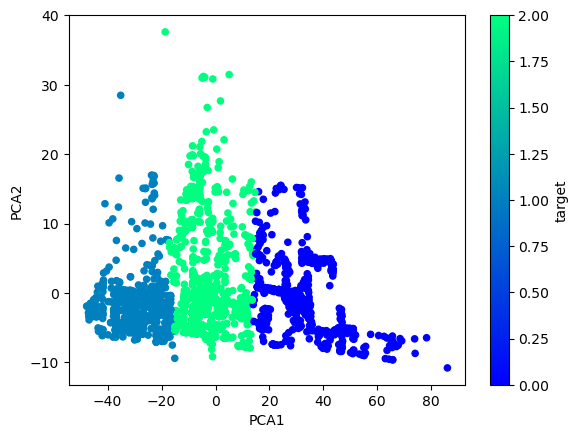

In [68]:
# Plot the clusters
df_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="target",
    colormap='winter')

In [64]:
# What columns contribute the most to the explained variance?
# Calculate the PCA explained variance ratio
pca.explained_variance_ratio_

array([9.41956947e-01, 5.28990517e-02, 1.13406816e-03, 7.73478656e-04,
       6.58900391e-04, 5.10445742e-04, 4.76709310e-04, 4.27057648e-04,
       3.42684048e-04, 2.57650587e-04, 2.15828309e-04, 1.44540909e-04,
       1.17797756e-04, 5.34366380e-05, 2.68940912e-05, 4.50863791e-06])

In [69]:
# Determine which feature has the stronger influence on each principal component. 
# Use the columns from the original DataFrame. FYI: The data has already been scaled and fitted.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=["PCA1", "PCA2", "PCA3","PCA4","PCA5", "PCA6", "PCA7","PCA8","PCA9", "PCA10", "PCA11", "PCA12","PCA13","PCA14", "PCA15", "PCA16"], index= df_clean.columns)
pca_component_weights

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16
Gender,-0.003087,-0.001132,-0.172363,-0.071827,-0.097396,0.360354,0.075030,0.436413,-0.027495,-0.363669,0.695722,0.008716,-0.049850,-0.023161,0.021527,-0.095357
Age,0.051921,0.997234,0.008519,-0.000999,-0.040373,-0.021762,-0.000056,0.022464,0.004444,0.003091,-0.003058,0.009695,-0.000413,0.001825,-0.002713,-0.001742
Height,0.001642,-0.001927,0.041740,-0.001087,0.007974,-0.033459,-0.008618,-0.035213,0.014525,0.048815,-0.060073,-0.021936,-0.015334,-0.006471,0.017837,-0.994220
Weight,0.998557,-0.051803,-0.000195,0.002809,0.005464,0.000549,0.006884,-0.000573,-0.000819,0.002985,0.006258,0.007940,-0.000905,0.000739,-0.000143,0.001312
family_history_with_overweight,0.007337,0.006292,0.004418,-0.008704,0.008144,-0.108116,-0.033284,0.036015,-0.188861,-0.022483,0.064910,-0.863070,0.444163,0.053627,-0.013068,0.006735
FAVC,0.003328,0.000266,-0.047625,-0.004797,-0.034853,-0.106091,0.001147,-0.002888,0.037048,-0.065086,-0.043492,-0.439197,-0.874726,0.134085,0.033334,0.024274
FCVC,0.004394,-0.002651,0.000669,-0.033027,-0.071931,0.578175,0.053086,0.504010,-0.083663,0.031684,-0.621279,-0.087243,-0.004697,-0.030513,-0.004455,0.001720
NCP,0.003166,-0.008711,0.389585,-0.898690,-0.130693,-0.032808,-0.030473,-0.057415,-0.078643,-0.103379,-0.014639,0.025051,-0.013235,0.004828,0.001613,0.014023
CAEC,-0.005143,-0.001705,0.034023,-0.122455,0.023833,0.113658,0.171541,0.154035,0.053134,0.903363,0.298145,-0.061114,-0.067971,-0.016123,-0.019360,0.020251
SMOKE,0.000146,0.002027,0.004054,-0.002227,0.000100,-0.004440,0.007959,0.007854,0.029115,0.025181,-0.011138,0.005716,0.046078,0.066921,0.995607,0.018897
